## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.


## ANSWER:

## 1) Solve by DBSCAN

In [1]:
#Import libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
(print(df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [5]:
#Column rename
df =df.rename(columns={'ID#':'ID','Award?':'Award'})

In [6]:
#as we know ID & award will not make much contribution
#We will drop both columns.
df1=df.drop(['ID','Award'], axis = 1)
df1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


In [7]:
array= df1.values

In [8]:
array

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [9]:
from sklearn.preprocessing import StandardScaler

stscaler = StandardScaler().fit(array) #if we do standscaler range of th values is -3 to 3
X = stscaler.transform(array)

In [10]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [41]:
from sklearn.cluster import DBSCAN  # DBSCAN can convert all the data in one cluster and there is noicy point given by -1 
dbscan = DBSCAN(eps=0.5, min_samples=12) # eps = radius ( we can change the size of eps & min_samples )
dbscan.fit(X)

DBSCAN(min_samples=12)

In [42]:
# Noicy samples are given the label -1
dbscan.labels_ #-1 represent noice

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

In [43]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [44]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,0
3995,0
3996,-1
3997,0


In [15]:
pd.concat([df,cl],axis=1)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


## 2) Solve By Using K-means Clustering

In [16]:
df1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [17]:
#Let's find null values in columns
df1.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

NO Nans found!!

## K-means Clustering

In [18]:
# Standardize the data to normal distributio 
from sklearn import preprocessing
data_standardized  = preprocessing.scale(df1)
print(data_standardized)
data_standardized = pd.DataFrame(data_standardized)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.39545434e+00]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.37995704e+00]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01  1.41192021e+00]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.28603258e-01
  -3.62167870e-01 -1.31560393e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ...  2.85309024e-02
  -9.85033311e-02 -1.31608822e+00]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.28603258e-01
  -3.62167870e-01 -1.31754109e+00]]


In [19]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1)
    sse.append(km.inertia_)

#### Elbow Graph (Screeplot)  is used to find the number of cluster.

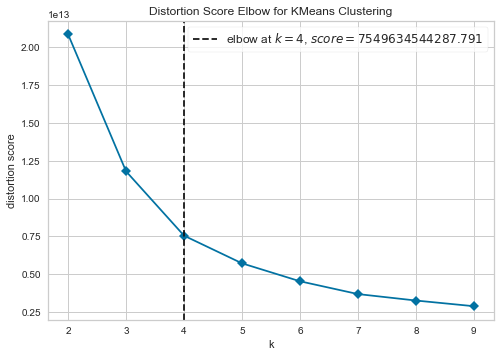

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(2,10),timings= False)
visualizer.fit(df1)
visualizer.show()

In [21]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++' , random_state = 42)
y_kmeans = kmeans.fit_predict(data_standardized)

y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
#Beginning of the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

#New list called cluster
cluster = list(y_kmeans1)
#Adding cluster to our data set
df1['cluster'] = cluster

In [23]:
#Mean of cluster 1 to 4 
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
cluster,,,,,,,,,,
1,42580.8,105.0,1.2,1.0,1.0,4240.0,6.6,212.5,0.6,3695.9
2,196162.6,792.9,2.2,1.0,1.0,32783.6,27.3,5422.1,16.0,4723.3
3,114765.8,138.4,3.7,1.0,1.0,37945.5,18.7,317.1,0.9,4811.1
4,138061.4,78.8,3.5,1.0,4.1,93927.9,28.1,506.7,1.6,4613.9


In [24]:
df1[df1['cluster']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
5,16420,0,1,1,1,0,0,0,0,6942,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,1


## 3)Solve By Using Hierarchical clustering

In [25]:
#import hireachical clustering libaries
import scipy.cluster.hierarchy as sch
from sklearn.cluster  import AgglomerativeClustering

In [26]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [27]:
#Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df1.iloc[:,1:])

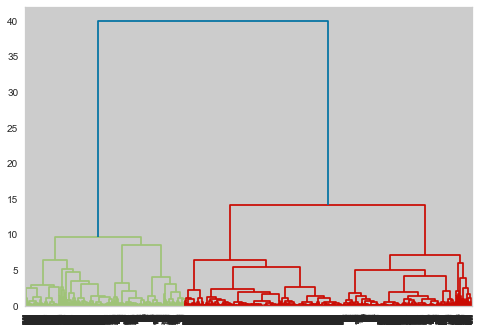

In [28]:
#Create dendogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [33]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')  ## linkage = single, average,complete,centroid we can use nay of them

In [34]:
hc

AgglomerativeClustering(linkage='average', n_clusters=4)

In [35]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [36]:
Clusters

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0
